In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [54]:
DT=pd.read_csv("delivery_time.csv")

In [3]:
DT.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Data Understanding

In [4]:
DT.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [47]:
DT.isna().sum()

Delivery_Time       0
Sorting_Time        0
Sorting_Time_sq     0
Delivery_Time_sq    0
dtype: int64

In [50]:
DT.dtypes

Delivery_Time       float64
Sorting_Time          int64
Sorting_Time_sq       int64
Delivery_Time_sq    float64
dtype: object

In [5]:
DT.shape

(21, 2)

In [51]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Delivery_Time     21 non-null     float64
 1   Sorting_Time      21 non-null     int64  
 2   Sorting_Time_sq   21 non-null     int64  
 3   Delivery_Time_sq  21 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 800.0 bytes


# EDA and Visualization

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

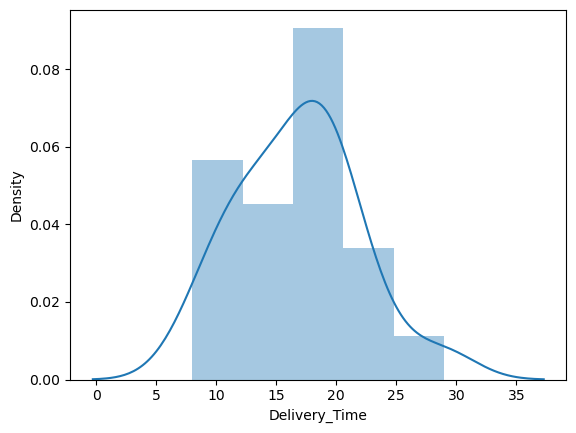

In [56]:
sns.distplot(DT['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

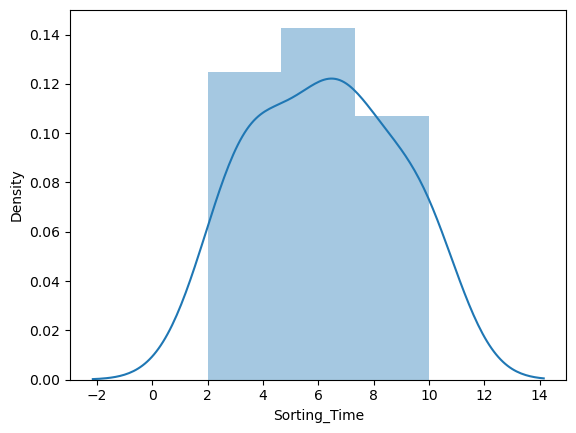

In [57]:
sns.distplot(DT['Sorting_Time'])

# Assumption Check
# Normality

[]

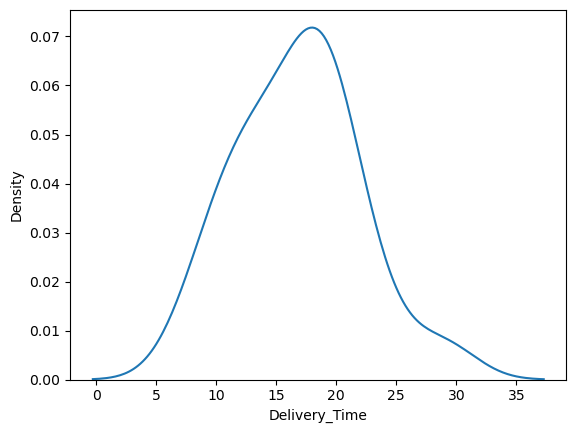

In [58]:
sns.distplot(a=DT['Delivery_Time'],hist=False)
plt.plot()

[]

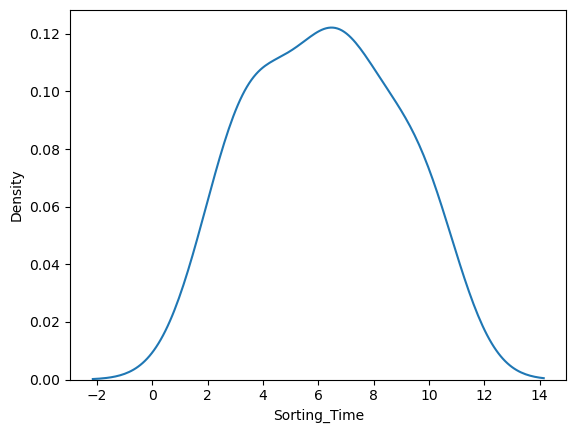

In [59]:
sns.distplot(a=DT['Sorting_Time'],hist=False)
plt.plot()

# Linearity

[]

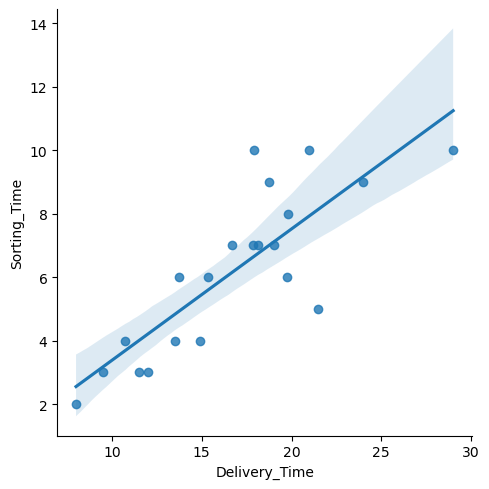

In [60]:
sns.lmplot(x='Delivery_Time',y='Sorting_Time',data=DT)
plt.plot()

# Creating model with statsmodel

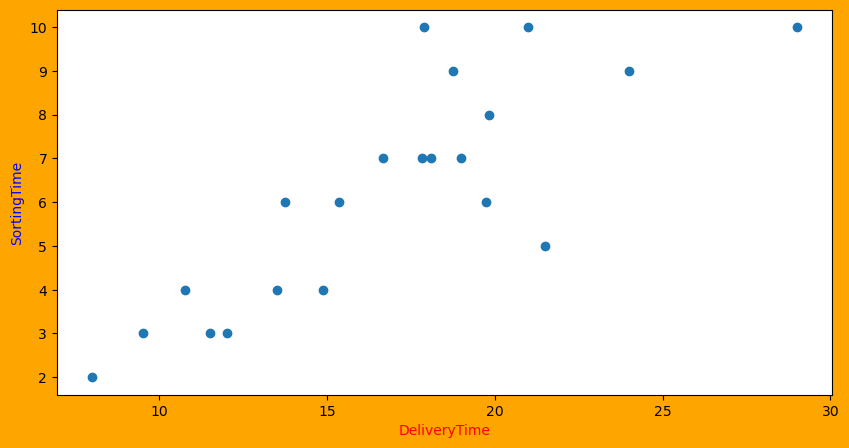

In [6]:
plt.figure(figsize=(10,5),facecolor="orange")
plt.scatter(DT.Delivery_Time,DT.Sorting_Time)
plt.xlabel("DeliveryTime",color="red")
plt.ylabel("SortingTime",color="blue")
plt.show()

In [7]:
DT.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [8]:
first_model=smf.ols("Delivery_Time~Sorting_Time",data=DT).fit()

In [9]:
first_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [10]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        17:24:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
first_model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [27]:
first_model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

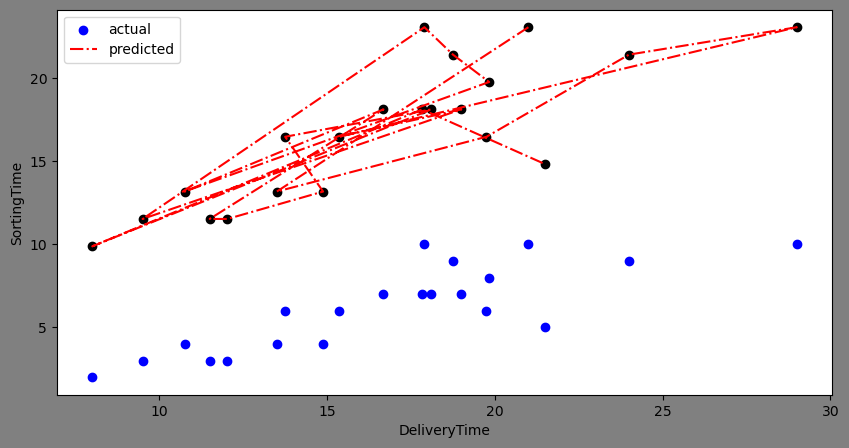

In [28]:
plt.figure(figsize=(10,5),facecolor='gray')
plt.scatter(DT.Delivery_Time,DT.Sorting_Time,color='blue',label="actual");
plt.plot(DT.Delivery_Time,first_model.predict(),label="predicted",color="red",linestyle="-.");
plt.scatter(DT.Delivery_Time,first_model.predict(),color="black")
plt.xlabel("DeliveryTime")
plt.ylabel("SortingTime")
plt.legend(loc="best")
plt.show()

# Taking Log Transformation

In [29]:
second_model=smf.ols('Delivery_Time~np.log(Sorting_Time)',data=DT).fit()

In [30]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        17:28:40   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
second_model.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [64]:
second_model.predict()

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

# Taking Exponential Transformation

In [31]:
third_model=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=DT).fit()

In [32]:
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 29 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           17:28:42   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
third_model.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [66]:
third_model.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

# Taking Square Transformation

In [43]:
DT['Sorting_Time_sq']=DT.Sorting_Time**2
fourth_model=smf.ols('Delivery_Time~Sorting_Time+Sorting_Time_sq',data=DT).fit()

In [44]:
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           2.39e-05
Time:                        17:48:15   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting_Time        2.8130      1.461      1.926      0.070      -0.256       5.882
Sorting_Time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
fourth_model.params

Intercept          3.522234
Sorting_Time       2.813002
Sorting_Time_sq   -0.093198
dtype: float64

In [68]:
fourth_model.predict()

array([22.33242955, 13.28306918, 17.04510832, 21.29019387, 22.33242955,
       17.04510832, 18.64653326, 11.12245499, 22.33242955, 21.29019387,
       20.06156177, 13.28306918, 18.64653326, 11.12245499, 11.12245499,
       13.28306918, 17.04510832, 18.64653326,  8.77544437, 18.64653326,
       15.25728696])

In [61]:
final_model=third_model

In [62]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 29 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           18:15:41   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
final_model.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [70]:
final_model.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

# Predict for new data points

In [71]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [72]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [73]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8
